In [82]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "sensorRLS6.geojson"
with open(file_path, "r") as f:
    geojson_data = json.load(f)

# Convert GeoJSON to dataframe 
features = geojson_data["features"]
data = [{**f["properties"], "longitude": f["geometry"]["coordinates"][0], "latitude": f["geometry"]["coordinates"][1]} for f in features]
df = pd.DataFrame(data)


In [9]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       148 non-null    int64  
 1   geom                     148 non-null    object 
 2   db_id                    148 non-null    object 
 3   model_type               148 non-null    object 
 4   time                     148 non-null    object 
 5   longitude                148 non-null    float64
 6   type                     148 non-null    object 
 7   device_alias             148 non-null    object 
 8   db_urn                   148 non-null    object 
 9   sensor_type_id           148 non-null    object 
 10  latitude                 148 non-null    float64
 11  provider                 148 non-null    object 
 12  temperatureMillidegreeC  148 non-null    int64  
 13  barometricPa             148 non-null    int64  
 14  humidityRh               1

None

,id,geom,db_id,model_type,time,longitude,type,device_alias,db_urn,sensor_type_id,latitude,provider,temperatureMillidegreeC,barometricPa,humidityRh,CO2Ppm,mos_gasResistance
0,428707,POINT (-120.05285959999999 34.692195999999996),"dB_2,2,351516172885360",2,2024-11-15T17:25:21,-120.052860,real,RLS6,"dB_2,2,351516172885360/2,2,15860494523415",30,34.692196,Redline Safety,19203,96776,39,627,319910
1,428708,POINT (-120.05286179999999 34.6921691),"dB_2,2,351516172885360",2,2024-11-15T17:24:19,-120.052862,real,RLS6,"dB_2,2,351516172885360/2,2,15860494585415",30,34.692169,Redline Safety,19394,96777,39,697,283099
2,428709,POINT (-120.05285049999999 34.6921263),"dB_2,2,351516172885360",2,2024-11-15T17:27:27,-120.052850,real,RLS6,"dB_2,2,351516172885360/2,2,15860494397415",30,34.692126,Redline Safety,18751,96771,39,568,349419
3,428710,POINT (-120.0528633 34.692211799999995),"dB_2,2,351516172885360",2,2024-11-15T17:26:26,-120.052863,real,RLS6,"dB_2,2,351516172885360/2,2,15860494458415",30,34.692212,Redline Safety,18967,96776,39,586,340681
4,428711,POINT (-120.05288379999999 34.692278),"dB_2,2,351516172885360",2,2024-11-15T17:29:31,-120.052884,real,RLS6,"dB_2,2,351516172885360/2,2,15860494273415",30,34.692278,Redline Safety,18744,96776,41,669,294145


In [10]:
# numerical attributes summary
cols = ["temperatureMillidegreeC", "barometricPa", "humidityRh", "CO2Ppm", "mos_gasResistance"]
numerical_summary = df[cols].describe()
display(numerical_summary)

,temperatureMillidegreeC,barometricPa,humidityRh,CO2Ppm,mos_gasResistance
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,19452.817568,96756.851351,37.398649,548.716216,347179.925676
std,2095.135243,60.993628,3.973963,136.547719,91348.220888
min,14944.000000,96589.000000,32.000000,443.000000,66133.000000
25%,18222.000000,96731.750000,34.000000,496.000000,298134.250000
50%,19409.500000,96769.000000,36.000000,507.000000,374120.000000
75%,20876.500000,96783.000000,40.250000,532.250000,415344.750000
max,23678.000000,97070.000000,47.000000,1547.000000,461647.000000


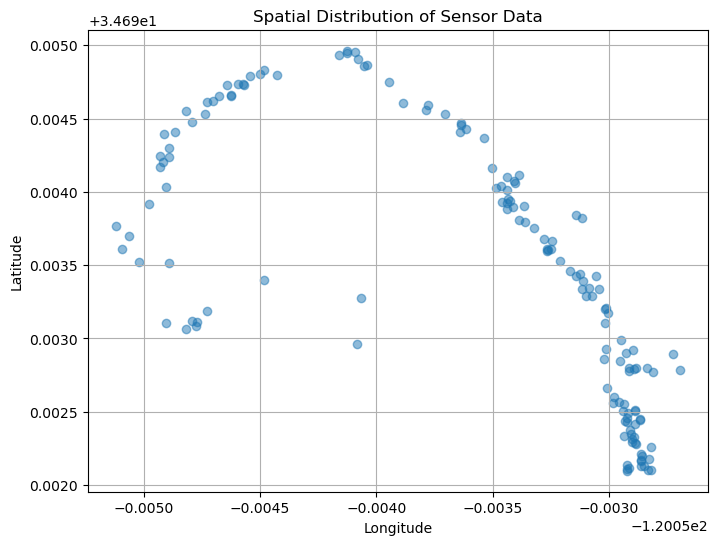

In [11]:
# scatter plot of sensor locations
plt.figure(figsize=(8, 6))
plt.scatter(df["longitude"], df["latitude"], alpha=0.5)
plt.title("Spatial Distribution of Sensor Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

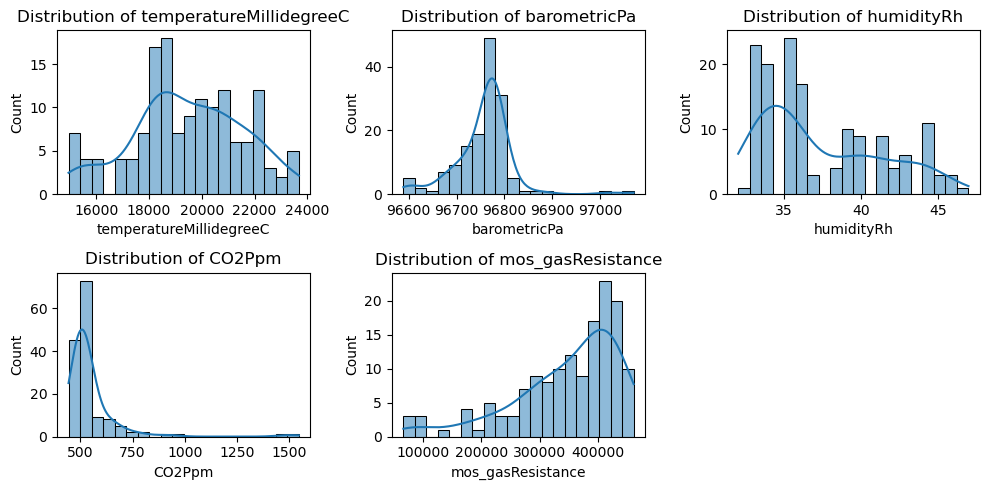

In [26]:
# histograms for numerical columns to check distributions

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

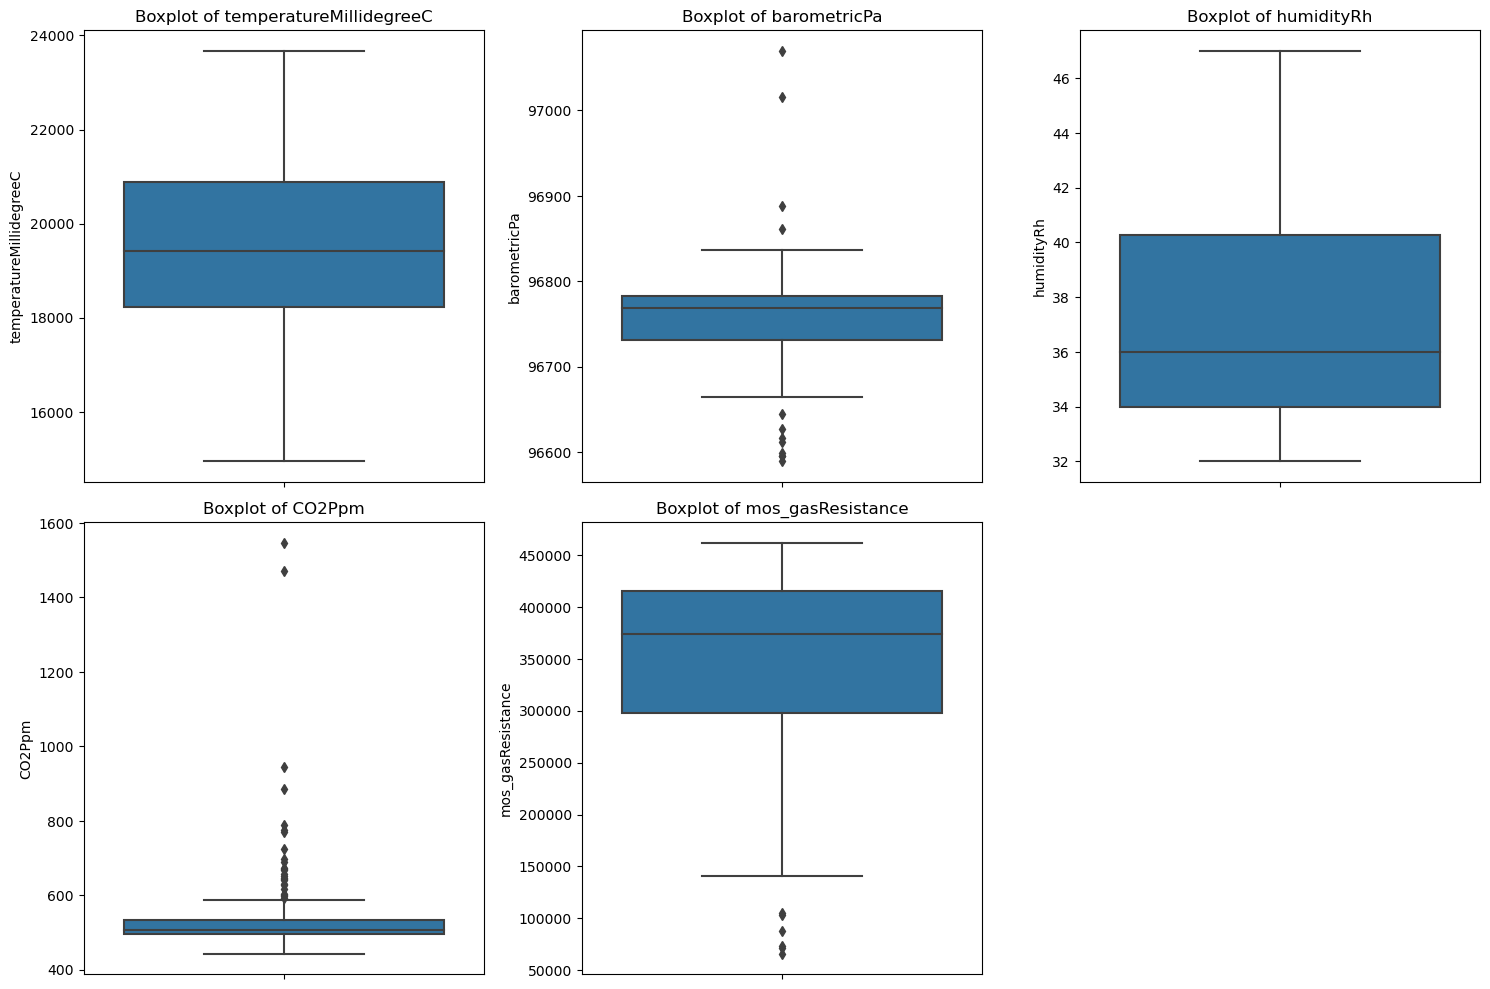

In [25]:
# boxplot to check for outliers for the numerical attributes

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

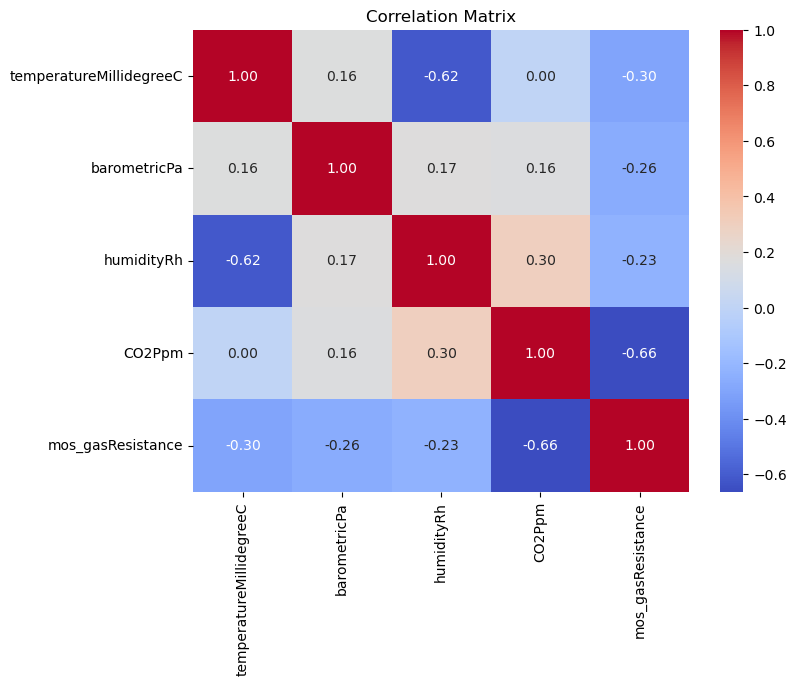

In [28]:
# correlation heatmap to check correlation between the attributes

plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [86]:
# get time
df["time"] = pd.to_datetime(df["time"], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
df["time_str"] = df["time"].dt.strftime("%H:%M:%S")

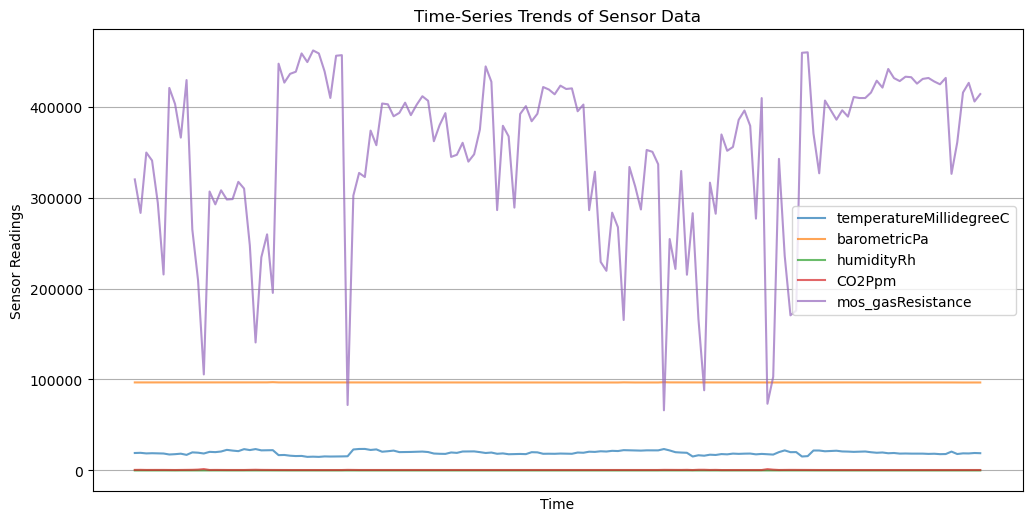

In [87]:
# time analysis
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    plt.plot(df["time_str"], df[col], label=col, alpha=0.7)
plt.title("Time-Series Trends of Sensor Data")
plt.xlabel("Time")
plt.ylabel("Sensor Readings")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks([])
plt.show()